In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed

In [8]:
df = pd.read_csv("smartphone_activity_dataset.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_523,feature_524,feature_525,feature_526,feature_527,feature_528,feature_529,feature_530,feature_531,feature_532,feature_533,feature_534,feature_535,feature_536,feature_537,feature_538,feature_539,feature_540,feature_541,feature_542,feature_543,feature_544,feature_545,feature_546,feature_547,feature_548,feature_549,feature_550,feature_551,feature_552,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,0.289,-0.0203,-0.133,-0.995,-0.983,-0.914,-0.995,-0.983,-0.924,-0.935,-0.567,-0.744,0.853,0.686,0.814,-0.966,-1.0,-1.0,-0.995,-0.994,-0.988,-0.943,-0.408,-0.679,-0.602,0.9290,-0.8530,0.360,-0.0585,0.2570,-0.2250,0.264,-0.0952,0.279,-0.4650,0.4920,-0.191,0.3760,0.4350,0.661,...,-0.991,-1.0,-0.937,0.347,-0.516,-0.803,-0.980,-0.961,-0.974,-0.952,-0.989,-0.980,-0.999,-0.993,-0.701,-1.000,-0.1290,0.586,0.375,-0.992,-0.991,-0.990,-0.992,-0.991,-0.992,-1.0,-0.990,-0.871,-1.000,-0.0743,-0.299,-0.710,-0.1130,0.03040,-0.465,-0.0184,-0.841,0.180,-0.0586,5.0
1,0.278,-0.0164,-0.124,-0.998,-0.975,-0.960,-0.999,-0.975,-0.958,-0.943,-0.558,-0.818,0.849,0.686,0.823,-0.982,-1.0,-1.0,-0.998,-0.999,-0.978,-0.948,-0.715,-0.501,-0.571,0.6120,-0.3300,0.284,0.2850,0.1160,-0.0910,0.294,-0.2810,0.086,-0.0222,-0.0167,-0.221,-0.0134,-0.0727,0.579,...,-0.991,-1.0,-0.841,0.532,-0.625,-0.900,-0.988,-0.983,-0.983,-0.986,-0.992,-0.988,-1.000,-0.994,-0.721,-0.949,-0.2720,-0.336,-0.720,-0.996,-0.996,-0.995,-0.997,-0.994,-0.996,-1.0,-0.995,-1.000,-1.000,0.1580,-0.595,-0.861,0.0535,-0.00743,-0.733,0.7040,-0.845,0.180,-0.0543,5.0
2,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,-0.558,-0.818,0.844,0.682,0.839,-0.983,-1.0,-1.0,-0.999,-0.997,-0.965,-0.975,-0.592,-0.486,-0.571,0.2730,-0.0863,0.337,-0.1650,0.0172,-0.0745,0.342,-0.3330,0.239,-0.1360,0.1740,-0.299,-0.1250,-0.1810,0.609,...,-0.987,-1.0,-0.905,0.661,-0.725,-0.929,-0.989,-0.986,-0.984,-0.991,-0.996,-0.989,-1.000,-0.993,-0.737,-0.795,-0.2130,-0.535,-0.872,-0.995,-0.995,-0.995,-0.996,-0.996,-0.995,-1.0,-0.994,-1.000,-0.556,0.4150,-0.391,-0.760,-0.1190,0.17800,0.101,0.8090,-0.849,0.181,-0.0491,5.0
3,0.279,-0.0262,-0.123,-0.996,-0.983,-0.991,-0.997,-0.983,-0.989,-0.939,-0.576,-0.830,0.844,0.682,0.838,-0.986,-1.0,-1.0,-1.000,-0.997,-0.984,-0.986,-0.627,-0.851,-0.912,0.0614,0.0748,0.198,-0.2640,0.0725,-0.1550,0.323,-0.1710,0.295,-0.3060,0.4820,-0.470,-0.3060,-0.3630,0.507,...,-0.988,-1.0,1.000,0.679,-0.701,-0.910,-0.989,-0.988,-0.987,-0.987,-0.996,-0.989,-1.000,-0.989,-0.721,-1.000,-0.0357,-0.230,-0.511,-0.995,-0.995,-0.996,-0.995,-0.996,-0.995,-1.0,-0.995,-0.956,-0.937,0.4050,-0.117,-0.483,-0.0368,-0.01290,0.640,-0.4850,-0.849,0.182,-0.0477,5.0
4,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,-0.569,-0.825,0.849,0.683,0.838,-0.993,-1.0,-1.0,-1.000,-0.998,-0.981,-0.991,-0.787,-0.559,-0.761,0.3130,-0.1310,0.191,0.0869,0.2580,-0.2730,0.435,-0.3150,0.440,-0.2690,0.1790,-0.089,-0.1560,-0.1900,0.599,...,-0.994,-1.0,-1.000,0.559,-0.529,-0.859,-0.991,-0.989,-0.988,-0.991,-0.998,-0.991,-1.000,-0.989,-0.763,-0.897,-0.2740,-0.510,-0.831,-0.995,-0.995,-0.995,-0.996,-0.997,-0.995,-1.0,-0.995,-1.000,-0.937,0.0878,-0.351,-0.699,0.1230,0.12300,0.694,-0.6160,-0.848,0.185,-0.0439,5.0


In [12]:
rotulos = np.array(df['activity'])
features = np.array(df.iloc[:, :-1])

perc_train = 0.8

n_train = int(features.shape[0]*perc_train)
n_test = int(features.shape[0]*(1-perc_train))
print(n_train)
print(n_test)

x_train = features[:n_train,:]
y_train = rotulos[:n_train]

x_test = features[n_train:,:]
y_test = rotulos[n_train:]

227
56


In [20]:
input_data = tf.keras.layers.Input(shape=(x_train.shape[1],))

x = keras.layers.Dropout(0.3)(input_data)
x = keras.layers.Dense(2, activation='linear')(x)
output = keras.layers.Dense(x_train.shape[1], activation='tanh')(x)

autoencoder = keras.models.Model(input_data, output)
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 561)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1124      
_________________________________________________________________
dense_9 (Dense)              (None, 561)               1683      
Total params: 2,807
Trainable params: 2,807
Non-trainable params: 0
_________________________________________________________________


In [25]:
#sementes
seed(1)
tf.random.set_seed(2)

#epochs e batchsize
epochs = 30
batchsize = 16

autoencoder.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                    loss='mae',
                    metrics=['accuracy'])

hist_autoencoder = autoencoder.fit(x_train, x_train, batch_size=batchsize, epochs=epochs) 

Epoch 1/30
15/15 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.2599
Epoch 2/30
15/15 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.3040
Epoch 3/30
15/15 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.3040
Epoch 4/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.3172
Epoch 5/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.2819
Epoch 6/30
15/15 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.2863
Epoch 7/30
15/15 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.2775
Epoch 8/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.3084
Epoch 9/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.3040
Epoch 10/30
15/15 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.3040
Epoch 11/30
15/15 [

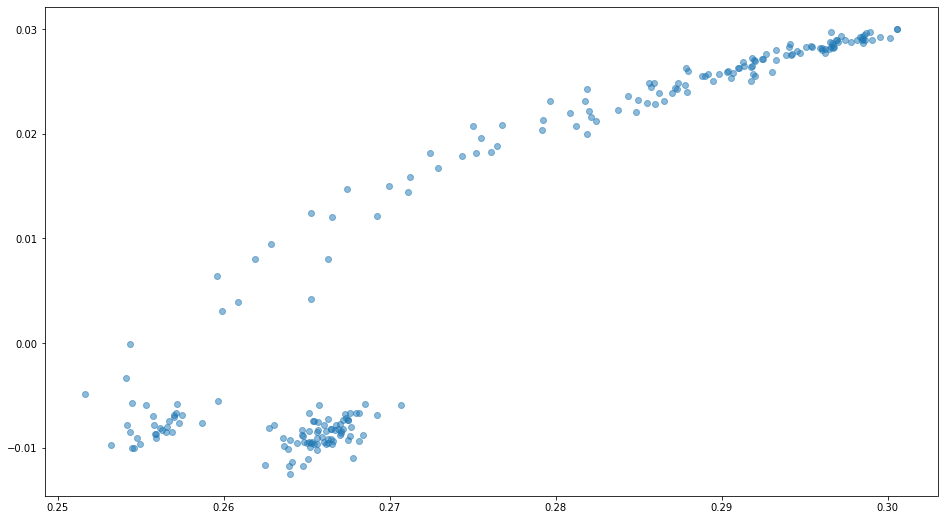

In [35]:
x_sub = x_train[:500]

code = autoencoder.predict(x_sub)
fig = plt.figure(figsize=(16,9))
plt.scatter(code[:,0],code[:,1],alpha=0.5)
plt.show()

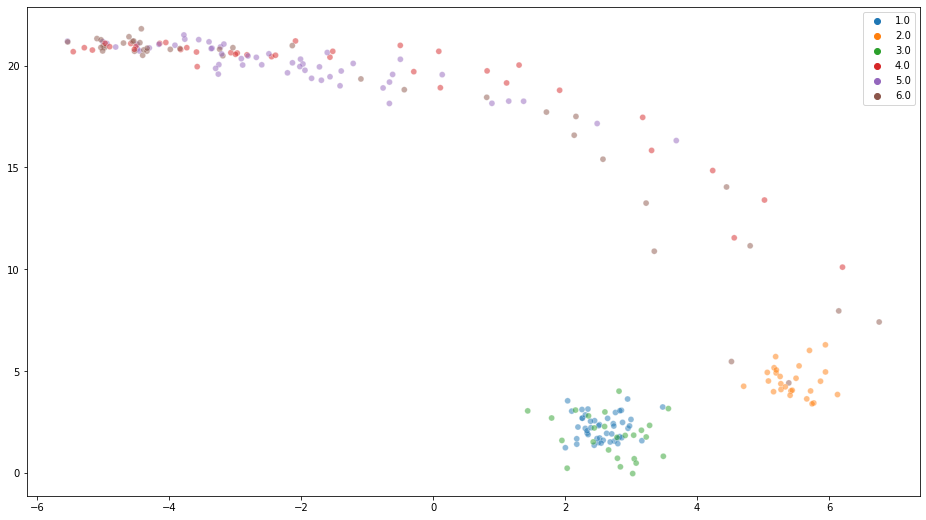

In [38]:
import seaborn as sns

x_sub = x_train[:500,:]
extract = keras.models.Model(autoencoder.inputs, autoencoder.layers[-2].output)
code = extract.predict(x_sub)
fig = plt.figure(figsize=(16,9))
sns.scatterplot(x=code[:,0],y=code[:,1],alpha=0.5,hue=y_train[:500], palette='tab10')
plt.show()